# ***This is a dataset of over 400 breast cancer patients who underwent surgery for the treatment of breast cancer. Below is the information of all columns in the dataset:***







## - Patient_ID: ID of the patient
## - Age: Age of the patient
## - Gender: Gender of the patient
## - Protein1, Protein2, Protein3, Protein4: expression levels
## - Tumor_Stage: Breast cancer stage of the patient
## - Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma
## - ER status: Positive/Negative
## - PR status: Positive/Negative
## - HER2 status: Positive/Negative
## - Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other
## - DateofSurgery: The date of Surgery
## - DateofLast_Visit: The date of the last visit of the patient
## - Patient_Status: Alive/Dead italicized text *italicized text*

# ***So by using this dataset, our task is to predict whether a breast cancer patient will survive or not after the surgery.***

In [1]:
## importing the necessary Python libraries and the dataset we need:

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
breast = pd.read_csv("BRCA.csv")

In [4]:
breast.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
breast.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [6]:
breast['Surgery_type'].unique()

array(['Modified Radical Mastectomy', 'Lumpectomy', 'Other',
       'Simple Mastectomy', nan], dtype=object)

In [7]:
breast['Histology'].unique()

array(['Infiltrating Ductal Carcinoma', 'Mucinous Carcinoma',
       'Infiltrating Lobular Carcinoma', nan], dtype=object)

In [8]:
breast['Tumour_Stage'].unique()

array(['III', 'II', 'I', nan], dtype=object)

In [9]:
## Let’s look whether the columns contains any null values or not:

In [10]:
breast.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [11]:
## let’s get more info about the columns of this data:

In [12]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [13]:
## let's drop these null values:

In [14]:
breast = breast.dropna()

In [15]:
breast.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [16]:
breast.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,317.000000,317.000000,317.000000,317.000000,317.000000
mean,58.725552,-0.027232,0.949557,-0.095104,0.006713
std,12.827374,0.543858,0.906153,0.589027,0.625965
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.350600,0.368840,-0.531360,-0.382240
50%,58.000000,0.005649,0.997130,-0.193040,0.038522
75%,67.000000,0.336260,1.612000,0.251210,0.436250
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [17]:
## Let’s have a look at the Gender column to see how many females and males are there: Breast cancer is mostly found in females

In [18]:
breast.Gender.value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [19]:
## let’s have a look at the stage of tumour of the patients:

In [20]:
stage = breast["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values
figure = px.pie(breast, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

In [21]:
## most of the patients are in the second stage.

In [22]:
## Now let’s have a look at the histology of breast cancer patients. (Histology is a description of a tumour based on how abnormal the cancer cells and tissue look under a microscope and how quickly cancer can grow and spread):

In [23]:
histology = breast["Histology"].value_counts()
transactions = histology.index
quantity = histology.values
figure = px.pie(breast, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

In [24]:
## let’s have a look at the values of ER status, PR status, and HER2 status of the patients:

In [25]:
breast["ER status"].value_counts()

Positive    317
Name: ER status, dtype: int64

In [26]:
breast["PR status"].value_counts()

Positive    317
Name: PR status, dtype: int64

In [27]:
breast["HER2 status"].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

In [28]:
## let’s have a look at the type of surgeries done to the patients:

In [29]:
surgery = breast["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values
figure = px.pie(breast, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Type of Surgery of Patients")
figure.show()

In [30]:
breast.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [31]:
## The dataset has a lot of categorical features. To use this data to train a machine learning model, we need to transform the values of all the categorical columns. 

In [32]:
breast["Tumour_Stage"] = breast["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
breast["Histology"] = breast["Histology"].map({"Infiltrating Ductal Carcinoma": 1, "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
breast["ER status"] = breast["ER status"].map({"Positive": 1})
breast["PR status"] = breast["PR status"].map({"Positive": 1})
breast["HER2 status"] = breast["HER2 status"].map({"Positive": 1, "Negative": 2})
breast["Gender"] = breast["Gender"].map({"MALE": 0, "FEMALE": 1})
breast["Surgery_type"] = breast["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, "Lumpectomy": 3, "Simple Mastectomy": 4})
breast.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,1,0.080353,0.42638,0.54715,0.273680,3,1,1,1,2,2,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,1,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,2,3,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,1,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,2,1,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,1,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,2,2,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,1,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,2,1,06-May-17,27-Jun-19,Dead


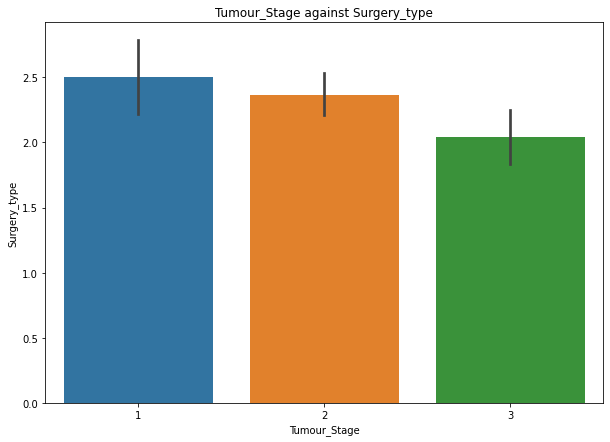

In [33]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Tumour_Stage',
            y = 'Surgery_type',
            data = breast)
plt.title("Tumour_Stage against Surgery_type")
plt.show()

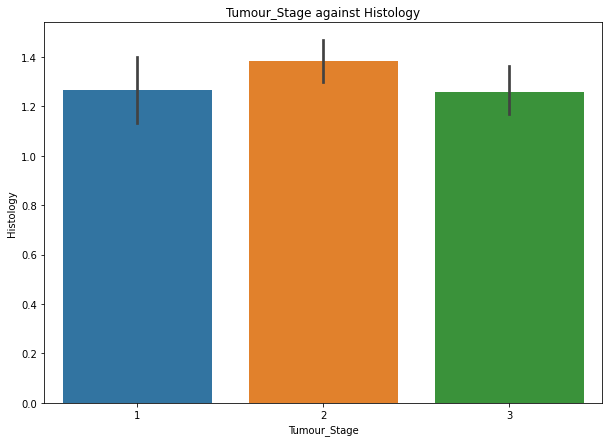

In [34]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Tumour_Stage',
            y = 'Histology',
            data = breast)
plt.title("Tumour_Stage against Histology")
plt.show()

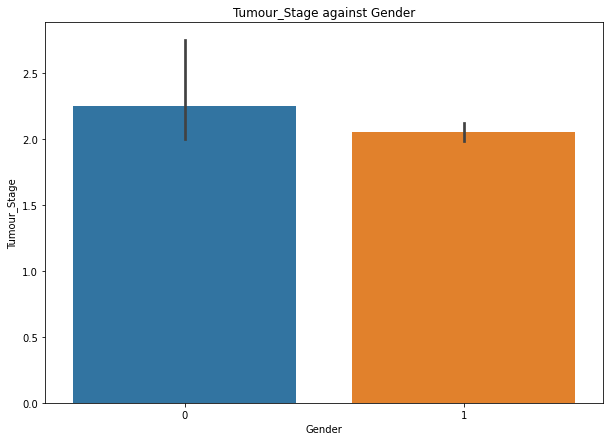

In [35]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Gender',
            y = 'Tumour_Stage',
            data = breast)
plt.title("Tumour_Stage against Gender")
plt.show()

In [36]:
breast["Gender"].value_counts()

1    313
0      4
Name: Gender, dtype: int64

In [37]:
## We can now move on to training a machine learning model to predict the survival of a breast cancer patient

In [38]:
x = np.array(breast[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']])
y = np.array(breast[['Patient_Status']])

In [39]:
## we need to split the data into training and test set:

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [41]:
## Now we can train a machine learning model:

In [42]:
model = SVC()

In [43]:
model.fit(xtrain, ytrain)

SVC()

In [44]:
## Now let’s input all the features that we have used to train this machine learning model

In [45]:
## predict whether a patient will survive from breast cancer or not:

In [46]:
# Prediction

# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]

features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
model.predict(features)

array(['Alive'], dtype=object)